In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV as gridsearchcv
from sklearn.metrics import mean_squared_error, make_scorer, r2_score, auc, roc_curve

from sklearn.neural_network import MLPClassifier as mlp
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.ensemble import AdaBoostClassifier as ada
from sklearn.svm import SVC as svc

from scipy import stats

import math
import os
import random

In [2]:
## Move to correct folder for server.  Can remove before sending
# os.chdir('/home/poblivsig/Dropbox/horses2')
os.chdir('/home/poblivsig/Dropbox/cancer_and_phishing')
print(os.getcwd())

/home/poblivsig/Dropbox/cancer_and_phishing


In [1]:
## Open the pre-processed csv
df = pd.read_csv('data/phishing.csv')

NameError: name 'pd' is not defined

In [2]:
## Get info about wine
print(f'Shape\n\n{df.shape}')
print(f'Columns\n\n{df.columns}')
print(f'dtypes\n\n{df.dtypes}')
pd.set_option('display.max_columns', None)
print(f'Description\n\n{df.describe()}')
print(f'Info:\n{df.info}')
print(f'Check out the sample: {df.sample(n=1)}')
pd.set_option('display.max_columns', 5)



NameError: name 'df' is not defined

In [3]:
# Count the different quality values
sns.countplot(df['Result'],
              palette='Blues',
              label="Quality Count", )
plt.plot()
plt.savefig('data/charts/phishing_countplot.png')

NameError: name 'sns' is not defined

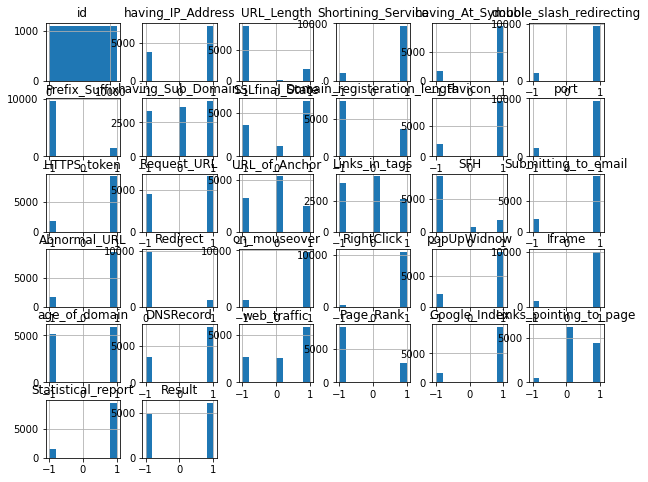

In [6]:
# Create mini-histograms for each attribute
df.hist(bins=10,
        figsize=(10, 8))
plt.show()


In [13]:
# Find the amount of correlation between each column and the quality
corrs = df.corr()
corr_quality = corrs['Result']
print('Amount of correlation (Pearsons r) for each column:')
print(corr_quality.sort_values(ascending=False))

Amount of correlation (Pearsons r) for each column:
Result                         1.000000
SSLfinal_State                 0.714741
URL_of_Anchor                  0.692935
Prefix_Suffix                  0.348606
web_traffic                    0.346103
having_Sub_Domain              0.298323
Request_URL                    0.253372
Links_in_tags                  0.248229
SFH                            0.221419
Google_Index                   0.128950
age_of_domain                  0.121496
Page_Rank                      0.104645
having_IP_Address              0.094160
Statistical_report             0.079857
DNSRecord                      0.075718
URL_Length                     0.057430
having_At_Symbol               0.052948
on_mouseover                   0.041838
port                           0.036419
Links_pointing_to_page         0.032574
Submitting_to_email            0.018249
RightClick                     0.012653
id                             0.000978
popUpWidnow                 

ValueError: The number of FixedLocator locations (32), usually from a call to set_ticks, does not match the number of ticklabels (1).

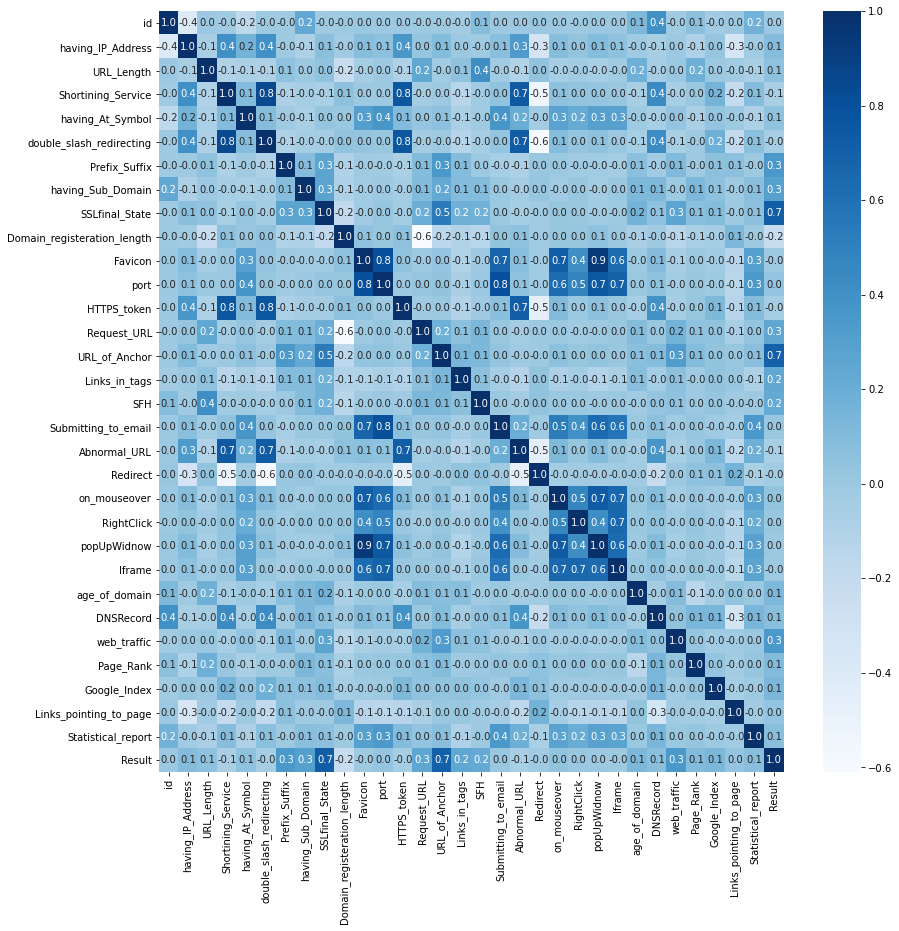

In [25]:
/home/poblivsig/Dropbox/horses2/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass thcol_names = ['Result',
             'SSLfinal_State',
             'URL_of_Anchor',
             'Prefix_Suffix',
             'web_traffic',
             'having_Sub_Domain',
             'Request_URL''',
             'Links_in_tags',
             'SFH''',
             'Google_Index',
             'age_of_domain',
             'Page_Rank',
             'having_IP_Address',
             'Statistical_report',
             'DNSRecord',
             'URL_Length',
             'having_At_Symbol',
             'on_mouseover',
             'port',
             'Links_pointing_to_page',
             'Submitting_to_email',
             'RightClick',
             'id',
             'popUpWidnow',
             'Favicon',
             'Iframe',
             'Redirect',
             'double_slash_redirecting',
             'HTTPS_token',
             'Abnormal_URL',
             'Shortining_Service',
             'Domain_registeration_length'],
fig, ax = plt.subplots(figsize=(14, 14))

# Create color map
colormap = sns.diverging_palette(220,
                                 10,
                                 as_cmap=True)

# Create Heat Map, including annotations
# Put the floating point numbers in the map
sns.heatmap(corrs,
            cmap='Blues',
            fmt=".1f",
            annot=True)

ax.set_xticklabels(
    col_names,
    horizontalalignment='right',
    rotation=45)

ax.set_yticklabels(col_names)
plt.savefig('data/charts/phishing_heatmap.png')
plt.show()

In [15]:
## Split up the data

y = df['Result']
X = df.drop('Result', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30,
                                                    stratify=y,
                                                    random_state=15)
print(df.shape)

(11055, 32)


In [16]:
# Scale the features (attributes)
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
# print(cross_val_score(decisiontreeclassifier(criterion = 'gini', random_state = 0), x_train, y_train, cv=5))
def gridsearch(estimator, param_grid, cv, scoring_metric):
    clf = gridsearchcv(estimator=estimator,
                       param_grid=param_grid,
                       n_jobs=-1,
                       cv=cv,
                       return_train_score=True,
                       scoring=scoring_metric,
                       verbose=3)
    clf.fit(X_train, y_train)

    ### Output the results
    print(f'Best parameters: {clf.best_params_}')
    print(f'Best score: {clf.best_score_}')
    best_estimate = clf.best_estimator_
    print(best_estimate)

    ## Now we have found the best parameters, use them...
    best_estimate.fit(X_train,y_train)

    predictor = best_estimate.predict(X_train)
    mse = mean_squared_error(predictor, y_train)
    r2 = r2_score(predictor, y_train)
    print(f'Training Mean Square Error: {mse:.2f}')
    print(f'Training R2: {r2:.2f}')

    y_predictor = best_estimate.predict(X_test)
    mse = mean_squared_error(y_test, y_predictor)
    r2 = r2_score(y_test, y_predictor)
    print(f'Testing Mean Square Error: {mse:.2f}')
    print(f'Testing R2: {r2:.2f}')
    print('blah')

    return best_estimate, y_predictor


In [18]:
def cm_and_class_rep(X_test, y_test, y_predictor, best_estimate):
    confusion_matrix(y_test, y_predictor)
    cm = plot_confusion_matrix(best_estimate,
                               X_test,
                               y_test,
                               cmap=plt.cm.Blues,
                               normalize='true' )
    plt.show(cm)
    plt.show()
    print(classification_report(y_test, y_predictor))

In [19]:
def draw_learning_curve(estimator_1,
                        estimator_1_name,
                        estimator_2,
                        estimator_2_name,
                        estimator_3,
                        estimator_3_name,
                        X_train,
                        y_train,
                        cv,
                        train_max,
                        title):

    ###################################
    # Do the 1st curve
    sizes, \
    training_scores, \
    testing_scores, \
    fit_times, \
    score_times = learning_curve(estimator_1,
                                 X_train,
                                 y_train,
                                 cv=cv,
                                 scoring='accuracy',
                                 return_times=True,
                                 train_sizes=np.arange(1, train_max, 10))

    # Mean of training scores
    mean_training = np.mean(training_scores, axis=1)

    # Mean of testing scores
    mean_testing = np.mean(testing_scores, axis=1)

    # Do the best lines
    plt.plot(sizes,
             mean_training,
             '--',
             label='Training Score - ' + estimator_1_name,
             color='blue')
    plt.plot(sizes,
             mean_testing,
             label='Cross Validation Score - ' + estimator_1_name,
             color='cornflowerblue')


    ###################################
    # Do the 2nd curve
    sizes, \
    training_scores, \
    testing_scores, \
    fit_times, \
    score_times = learning_curve(estimator_2,
                                 X_train,
                                 y_train,
                                 cv=cv,
                                 scoring='accuracy',
                                 return_times=True,
                                 train_sizes=np.arange(1, train_max, 10))

    # Mean of training scores
    mean_training = np.mean(training_scores, axis=1)

    # Mean of testing scores
    mean_testing = np.mean(testing_scores, axis=1)

    # Do the best lines
    plt.plot(sizes,
             mean_training,
             '--',
             label='Training Score - ' + estimator_2_name,
             color='green')
    plt.plot(sizes,
             mean_testing,
             label='Cross Validation Score - ' + estimator_2_name,
             color='springgreen')

    ###################################
    # Do the 3rd curve
    sizes, \
    training_scores, \
    testing_scores, \
    fit_times, \
    score_times = learning_curve(estimator_3,
                                 X_train,
                                 y_train,
                                 cv=cv,
                                 scoring='accuracy',
                                 return_times=True,
                                 train_sizes=np.arange(1, train_max, 10))

    # Mean of training scores
    mean_training = np.mean(training_scores, axis=1)

    # Mean of testing scores
    mean_testing = np.mean(testing_scores, axis=1)

    # Do the best lines
    plt.plot(sizes,
             mean_training,
             '--',
             label='Training Score - ' + estimator_3_name,
             color='red')
    plt.plot(sizes,
             mean_testing,
             label='Cross Validation Score - ' + estimator_3_name,
             color='lightcoral')

    # Do the final plots
    plt.title(title)
    plt.xlabel('Training Set Size'), plt.ylabel('Accuracy'), plt.legend(loc="best")
    plt.tight_layout()
    plt.savefig('data/charts/phishing_learning_curve.png')
    plt.show()

In [20]:
# Draw Validation Curve
def draw_validation_curve(estimator, X_train, y_train, cv, param_name, param_range, title, xlabel):

    train_scores, test_scores = validation_curve(estimator,
                                                 X_train,
                                                 y_train,
                                                 param_name=param_name,
                                                 param_range=param_range,
                                                 cv=cv,
                                                 scoring='accuracy',
                                                 n_jobs=-1)

    # Mean from the scores for the training set
    train_mean = np.mean(train_scores, axis=1)

    # Mean from the scores for the test set
    test_mean = np.mean(test_scores, axis=1)

    # Create plot for training
    plt.plot(param_range,
             train_mean,
             label="Training score",
             color="blue")

    # Create plot for testing
    plt.plot(param_range,
             test_mean,
             label="Cross-validation score",
             color="red")

    # Build plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Accuracy Score")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.savefig('data/charts/phishing_validation_curve.png')
    plt.show()


dt_max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
Fitting 8 folds for each of 236 candidates, totalling 1888 fits
Best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10}
Best score: 0.9609131500351363
DecisionTreeClassifier(class_weight='balanced', max_depth=10)
Training Mean Square Error: 0.14
Training R2: 0.86
Testing Mean Square Error: 0.21
Testing R2: 0.78
blah
              precision    recall  f1-score   support

          -1       0.93      0.95      0.94      1470
           1       0.96      0.94      0.95      1847

    accuracy                           0.95      3317
   macro avg       0.94      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 912 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 1808 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 1873 out of 1888 | elapsed:   11.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1888 out of 1888 | elapsed:   11.0s finished


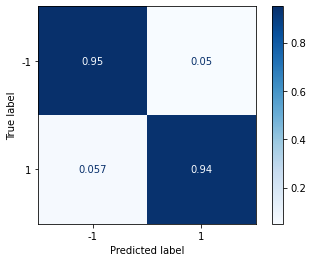

In [41]:
# Do Decision Tree stuff...

# Do a grid search for the Decision Tree
dt_criterion = ['gini', 'entropy']
dt_max_depth = [count for count in range(1, 60)]
dt_class_weight = [None, 'balanced']
print(f'dt_max_depth = {dt_max_depth}')
param_grid = dict(criterion=dt_criterion,
                  max_depth=dt_max_depth,
                  class_weight=dt_class_weight)

best_estimate, y_predictor = gridsearch(estimator=dtc(),
                                        param_grid=param_grid,
                                        cv=8,
                                        scoring_metric='precision')

cm_and_class_rep(X_test, y_test, y_predictor, best_estimate)

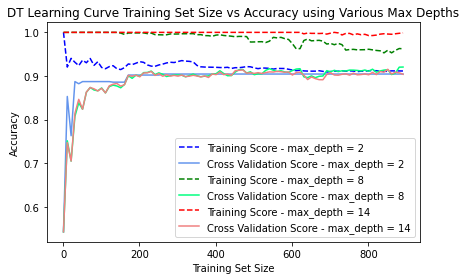

In [42]:
# Decision Tree learning curve

## TODO: Grab these values from best_estimate above
tuned_criterion = 'entropy'
tuned_max_depth=2
tuned_class_weight='balanced'

# Best depth
draw_learning_curve(dtc(criterion=tuned_criterion,
                        max_depth=tuned_max_depth,
                        class_weight=tuned_class_weight),
                    'max_depth = 2',
                    dtc(criterion='entropy',
                        max_depth=8,
                        class_weight='balanced'),
                    'max_depth = 8',
                    dtc(criterion='entropy',
                        max_depth=14,
                        class_weight='balanced'),
                    'max_depth = 14',
                    X_train,
                    y_train,
                    cv=8,
                    train_max=900,
                    title = 'DT Cancer Learning Curve Training Set Size vs Accuracy using Various Max Depths')

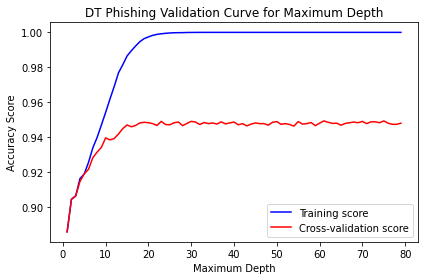

In [43]:
# Draw Decision Tree Validation Curve
draw_validation_curve(dtc(criterion=tuned_criterion,
                          class_weight=tuned_class_weight),
                      X_train,
                      y_train,
                      cv=7,
                      param_name='max_depth',
                      param_range=np.arange(0,80),
                      title='DT Phishing Validation Curve for Maximum Depth',
                      xlabel='Maximum Depth')

In [ ]:
# Do MLP stuff...
MAX_LAYER_SIZE = 20
hidden_layer_sizes = [layers for layers in range(1, MAX_LAYER_SIZE)]
activation = ['tanh', 'relu']
max_iter = [500, 1000, 1500, 2000]
alpha = 10.0 ** -np.arange(1,7)
learning_rate = ['constant', 'adaptive']
param_grid = dict(hidden_layer_sizes=hidden_layer_sizes,
                  activation=activation,
                  max_iter=max_iter,
                  alpha=alpha,
                  learning_rate=learning_rate)

best_estimate, y_predictor = gridsearch(estimator=mlp(),
                                        param_grid=param_grid,
                                        cv=8,
                                        scoring_metric='precision')

cm_and_class_rep(X_test, y_test, y_predictor, best_estimate)

In [ ]:
# MLP learning curve
tuned_hidden_layer_sizes =
tuned_activation =
tuned_max_iter =
tuned_alpha =
tuned_learning_rate =

draw_learning_curve(mlp(hidden_layer_sizes=tuned_hidden_layer_sizes,
                        activation=tuned_activation,
                        max_iter=tuned_max_iter,
                        alpha=tuned_alpha,
                        learning_rate=tuned_alpha),
                    'hidden_layer_size = ',
                    mlp(hidden_layer_sizes=,
                        activation=,
                        max_iter=,
                        alpha=,
                        learning_rate=,
                    'hidden_layer_size = ',
                    mlp(hidden_layer_sizes=,
                        activation=,
                        max_iter=,
                        alpha=,
                        learning_rate=t,
                    'hidden_layer_size = ',
                    X_train,
                    y_train,
                    cv=8,
                    train_max=500,
                    title = 'MLP Phishing Learning Curve Training Set Size vs. hidden layer size')

In [ ]:
# Draw MLP Validation Curve
draw_validation_curve(dtc(hidden_layer_sizes=tuned_hidden_layer_sizes,
                          activation=tuned_activation,
                          max_iter=tuned_max_iter,
                          alpha=tuned_alpha,
                          learning_rate=tuned_alpha),
                      X_train,
                      y_train,
                      cv=7,
                      param_name='hidden_layer_sizes',
                      param_range=np.arange(0,MAX_LAYER_SIZE),
                      title='MLP Phishing Validation Curve for Hidden Layer Sizes',
                      xlabel='Hidden Layer Sizes')

Fitting 8 folds for each of 624 candidates, totalling 4992 fits
Best parameters: {'algorithm': 'ball_tree', 'metric': 'chebyshev', 'n_neighbors': 34, 'weights': 'uniform'}
Best score: 0.9222129872571727
KNeighborsClassifier(algorithm='ball_tree', metric='chebyshev', n_neighbors=34)
Training Mean Square Error: 0.73
Training R2: 0.25
Testing Mean Square Error: 0.84
Testing R2: 0.15
blah
              precision    recall  f1-score   support

          -1       0.78      0.73      0.76      1470
           1       0.80      0.84      0.82      1847

    accuracy                           0.79      3317
   macro avg       0.79      0.79      0.79      3317
weighted avg       0.79      0.79      0.79      3317



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 2712 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 28.6min
[Parallel(n_jobs=-1)]: Done 3736 tasks      | elapsed: 35.3min
[Parallel(n_jobs=-1)]: Done 4344 tasks      | elapsed: 46.8min
[Parallel(n_jobs=-1)]: Done 4992 out of 4992 | elapsed: 55.6min finished


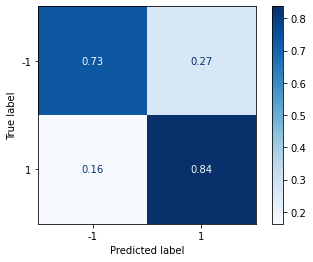

In [24]:
# Do KNN stuff
# Set the parameters by cross-validation
MAX_NEIGHBORS=40
n_neighbors=[layers for layers in range(1, MAX_NEIGHBORS)]
metric=['manhattan', 'euclidean', 'chebyshev']
weights=['uniform', 'distance']
algorithm=['kd_tree', 'ball_tree']
param_grid = dict(n_neighbors=n_neighbors,
                  metric=metric,
                  weights=weights,
                  algorithm=algorithm)
best_estimate, y_predictor = gridsearch(estimator=knn(),
                                        param_grid=param_grid,
                                        cv=8,
                                        scoring_metric='precision')

cm_and_class_rep(X_test, y_test, y_predictor, best_estimate)


In [28]:
# KNN learning curve
tuned_n_neighbors = 34
tuned_metric = 'chebyshev'
tuned_weights = 'uniform'
tuned_algorithm = 'ball_tree'

draw_learning_curve(knn(n_neighbors=3,
                        metric=tuned_metric,
                        weights=tuned_weights,
                        algorithm=tuned_algorithm),
                    'Nearest Neighbors = 3',
                    knn(n_neighbors=20,
                        metric=tuned_metric,
                        weights=tuned_weights,
                        algorithm=tuned_algorithm),
                    'Nearest Neighbors = 20',
                    knn(n_neighbors=36,
                        metric=tuned_metric,
                        weights=tuned_weights,
                        algorithm=tuned_algorithm),
                    'Nearest Neighbors = 36',
                    X_train,
                    y_train,
                    cv=8,
                    train_max=500,
                    title = 'KNN Phishing Learning Curve Training Set Size vs Nearest Neighbors')

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 1, n_neighbors = 3

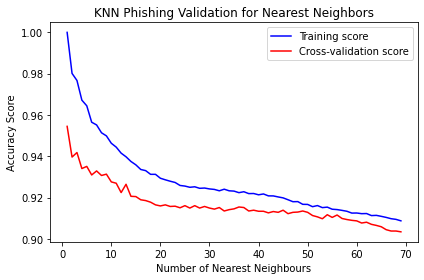

In [60]:
# Draw KNN Validation Curve
draw_validation_curve(knn(tuned_metric=tuned_metric,
                          tuned_weights=tuned_weights,
                          tuned_algorithm=tuned_algorithm),
                      X_train,
                      y_train,
                      cv=7,
                      param_name='n_neighbors',
                      param_range=np.arange(0, MAX_NEIGHBORS),
                      title='KNN Phishing Validation for Nearest Neighbors',
                      xlabel='Number of Nearest Neighbors')

Fitting 10 folds for each of 91 candidates, totalling 910 fits
Best parameters: {'learning_rate': 0.64, 'n_estimators': 80}
Best score: 0.9529382428443938
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         criterion='entropy',
                                                         max_depth=2),
                   learning_rate=0.64, n_estimators=80)
Training Mean Square Error: 0.16
Training R2: 0.84
Testing Mean Square Error: 0.19
Testing R2: 0.81
blah
              precision    recall  f1-score   support

          -1       0.95      0.94      0.95      1470
           1       0.96      0.96      0.96      1847

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 336 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 560 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 848 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 910 out of 910 | elapsed:  1.9min finished


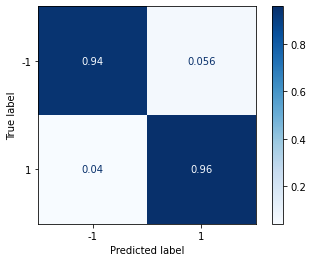

In [47]:
# Do Boosting stuff
# Set the parameters by cross-validation
ada_learning_rate = [(2**x)/100 for x in range(7)]
ada_n_estimators = [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# N.B. These hyper-parameters are from previous decision tree tuning.
ada_dt = dtc(criterion=tuned_criterion,
             max_depth=tuned_max_depth,
             class_weight=tuned_class_weight)
param_grid = dict(learning_rate=ada_learning_rate,
                  n_estimators=ada_n_estimators)
best_estimate, y_predictor = gridsearch(estimator=ada(ada_dt),
                                        param_grid=param_grid,
                                        cv=10,
                                        scoring_metric='precision')

cm_and_class_rep(X_test, y_test, y_predictor, best_estimate)

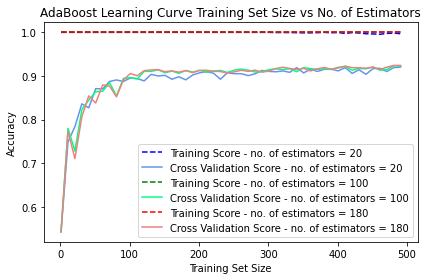

In [49]:
# Boosting learning curve

## Grab these values from best_estimate above
tuned_learning_rate = 0.64
tuned_n_estimators = 100

draw_learning_curve(ada(ada_dt,
                        learning_rate=tuned_learning_rate,
                        n_estimators=20),
                    'no. of estimators = 20',
                    ada(ada_dt,
                        learning_rate=tuned_learning_rate,
                        n_estimators=100),
                    'no. of estimators = 100',
                    ada(ada_dt,
                        learning_rate=tuned_learning_rate,
                        n_estimators=180),
                    'no. of estimators = 180',
                    X_train,
                    y_train,
                    cv=8,
                    train_max=500,
                    title = 'AdaBoost Phishing Learning Curve Training Set Size vs No. of Estimators')

In [50]:
# Draw Boosting Validation Curve
draw_validation_curve(ada(ada_dt,
                          learning_rate=tuned_learning_rate,
                          n_estimators=),
                      X_train,
                      y_train,
                      cv=7,
                      param_name='n_estimators',
                      param_range=ada_n_estimators,
                      title='Boosting Phishing Validation for No. of Estimators',
                      xlabel='Number of Estimators')

SyntaxError: invalid syntax (<ipython-input-50-e998c132a67a>, line 4)

In [ ]:
# Do SVM stuff
# Set the parameters by cross-validation
svc_C = np.arange(0.001, 2.5, 0.5)
svc_tol = np.arange(1e-8, 1e-1, 0.05)
svc_kernel = ['linear', 'poly', 'rbf', 'sigmoid'] #'precomputed']
svc_gamma = [1, 0.1, 0.01, 0.001, 0.0001]
param_grid = dict(C=svc_C,
                  tol=svc_tol,
                  kernel=svc_kernel,
                  gamma = svc_gamma)
best_estimate, y_predictor = gridsearch(estimator=svc(),
                                        param_grid=param_grid,
                                        cv=8,
                                        scoring_metric='precision')

cm_and_class_rep(X_test, y_test, y_predictor, best_estimate)

Fitting 8 folds for each of 200 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   12.1s


In [ ]:
tuned_C =
tuned_tol =
tuned_kernel =
tuned_gamma =

# SVM learning curve
draw_learning_curve(svc(C=tuned_C,
                        tol=tuned_tol,
                        kernel=tuned_kernel,
                        gamma=),
                        'gamma = ',
                    svc(C=tuned_C,
                        tol=tuned_tol,
                        kernel=tuned_kernel,
                        gamma=),
                     'gamma = ',
                    svc(C=tuned_C,
                        tol=tuned_tol,
                        kernel=tuned_kernel,
                        gamma=),
                    'gamma = ',
                    X_train,
                    y_train,
                    cv=8,
                    train_max=500,
                    title = 'SVM Phishing Learning Curve Training Set Sizes vs Gamma')

In [ ]:
# Draw Boosting Validation Curve
draw_validation_curve(svc(C=tuned_C,
                         tol=tuned_tol,
                         kernel=tuned_kernel,
                         gamma=),
                      X_train,
                      y_train,
                      cv=7,
                      param_name='gamma',
                      param_range=svc_gamma,
                      title='SVM Phishing Validation for Gamma',
                      xlabel='Gamma')